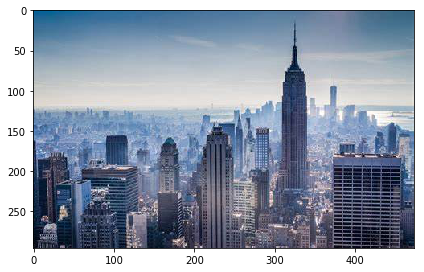

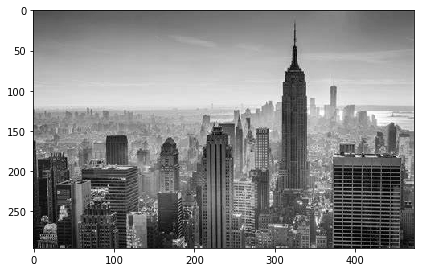

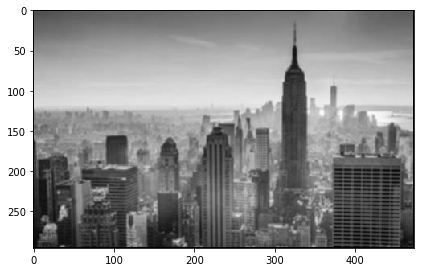

In [6]:
import os 
import numpy as np
# importing io from skimage 
import skimage 
from skimage import io 
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import scipy
from scipy import misc

  
# way to load car image from file 
  
img = io.imread(r"C:\Users\Archana.C\Desktop\th.jpg") 
io.imshow(img) 
io.show()
gray=rgb2gray(img)
io.imshow(gray) 
io.show()
r,c=np.shape(gray)
b=np.zeros((r,c))
for i in range(1,r-1):
    for j in range (1,c-1):
        b[i,j]=(gray[(i-1),(j-1)]+gray[(i-1),j]+gray[(i-1),(j+1)]+gray[i,(j-1)]+gray[i,j]+gray[i,(j+1)]+gray[(i+1),(j-1)]+gray[(i+1),j]+gray[(i+1),(j+1)])/9
io.imshow(b) 
io.show()

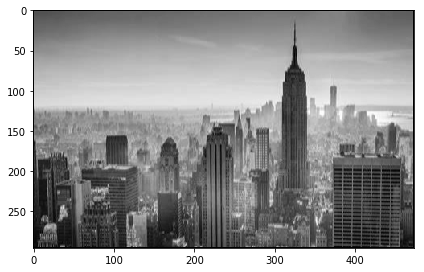

In [7]:
imagen_nueva = np.empty((r,c)) #the new image. the same size as the image I will filter

ker1 = np.array([[0, 1, 0],   #3x3 kernel
                [0, 1, 0],
                [0, 1, 0]])

imagen_nueva = np.zeros(gray.shape)
for i in range(1,r-1): #the range starts from 1 to avoid the column and row of zeros, and ends before the last col and row of zeros
    for j in range(1,c-1):
        imagen_entry = gray[i-1:i+2, j-1:j+2]     #Main problem here: how do I define a 3x3 matrix for each entry?
        valor = np.sum(imagen_entry*ker1)/3   #Matrix 3x3 is filled with the elements around each [i, j] entry of the array
        imagen_nueva[i,j]= valor #This is supposed to each new [i, j] entry to the new image

io.imshow(imagen_nueva)  #Show new image

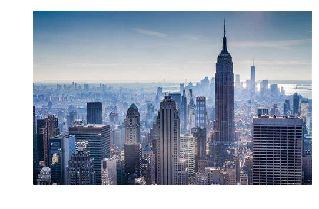

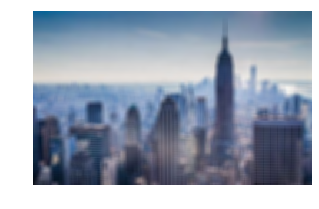

In [8]:
import os
import skimage 
from skimage import io
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pylab as plt

img = io.imread(r"C:\Users\Archana.C\Desktop\th.jpg")
def plti(img, h=8, **kwargs):
    """
    Helper function to plot an image.
    """
    y = img.shape[0]
    x = img.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(img, interpolation="none", **kwargs)
    plt.axis('off')

plti(img)

def convolve_all_colours(im, window):
    """
    Convolves im with window, over all three colour channels
    """
    ims = []
    for d in range(3):
        img_conv_d = convolve2d(img[:,:,d], window, mode="same", boundary="symm")
        ims.append(img_conv_d)

    img_conv = np.stack(ims, axis=2).astype("uint8")
    
    return img_conv

n=10
window = np.ones((n,n))
window /= np.sum(window)
plti(convolve_all_colours(img, window))

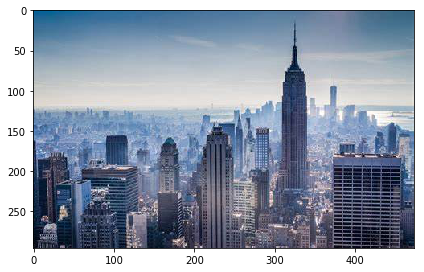

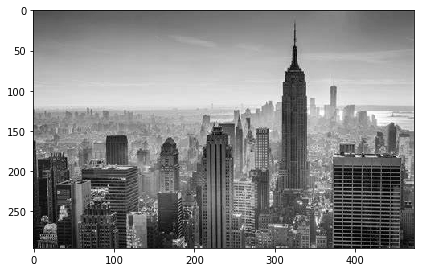

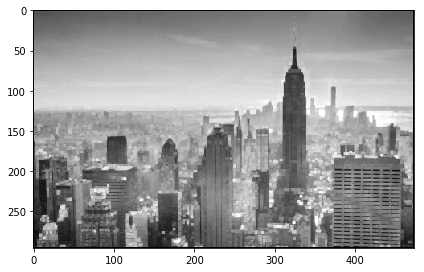

In [9]:
import os 
import numpy as np
# importing io from skimage 
import skimage 
from skimage import io 
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import scipy
from scipy import misc

  
# way to load car image from file 
  
img = io.imread(r"C:\Users\Archana.C\Desktop\th.jpg") 

# way to show the input image 
io.imshow(img) 
io.show()

gray=rgb2gray(img)
io.imshow(gray) 
io.show()
r,c=np.shape(gray)
d=np.zeros((r,c))
for i in range(1,r-1):
    for j in range (1,c-1):
        d[i,j]=max(gray[(i-1),(j-1)],gray[(i-1),j],gray[(i-1),(j+1)],gray[i,(j-1)],gray[i,j],gray[i,(j+1)],gray[(i+1),(j-1)],gray[(i+1),j],gray[(i+1),(j+1)])
io.imshow(d) 
io.show()